# Sampling Methods to Address Imbalance Sample Problem

## Skills: Data Preprocessing, Oversampling, SMOTE, Borderline SMOTE, SVM SMOTE, ADASYN, TOMEK

Imbalance sample is a very common problem in classification.  The ratio of minority class to majority class can be as low as 1:100.  In this type of biased sample, it is difficult for machine learning algorithms to work well because there are too few minority cases to learn from.  There are various sampling strategies to solve this problem.  This following example uses churn prediction in a retail bank to illustrate how sampling strategies improve prediction.  There are only a few customers churn in any time period.  The quarterly churn rate is as low as 4%.  The sample is highly imbalanced.  The data is already cleaned, train set and test set are prepared in the Split Sample notebook.

In [1]:
import numpy as np
import pandas as pd
from numpy import unique
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.  We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly.

In [2]:
#Loading Data
X_train = read_csv('X_train.csv', header=0)
X_test = read_csv('X_test.csv', header=0)
y_train = read_csv('y_train.csv', header=0)
y_test = read_csv('y_test.csv', header=0)

In [4]:
X_train.head(5)

,Memberid,Age,NumberofSavingsProducts,CountofLoans,DBINDICATOR,CCINDICATOR,INDIRECT,RecencyGap,Freq,DDAmt,...,NofLP_sk,NofDD_k,NofBP_k,NofDC_k,NofIB_k,FC_k,SofFC_k,NofTT_k,OL_k,NofLP_k
0,4444R4MGG,80.0,1.0,1,0,0,1,1,1.583333,1.666667,...,-0.161056,12.000000,0.000000,0.000000,12.000000,12.000000,12.000000,2.640000,8.884615,-1.260793
1,444F4RR4K,31.0,1.0,1,0,0,0,1,2.500000,66.666667,...,0.000000,4.145912,0.000000,0.000000,3.165306,0.000000,0.000000,4.119611,1.701563,5.500000
2,444RMTMGF,31.0,1.0,1,0,0,1,1,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4458RZK85,51.0,2.0,0,1,0,0,1,19.333333,1500.515833,...,0.000000,0.130322,0.000000,8.613591,-1.865455,2.640000,10.598753,9.271978,-1.484220,0.000000
4,445G55TMG,20.0,2.0,0,1,1,0,1,49.583333,518.871667,...,0.000000,-0.774459,-0.743837,-0.828120,2.640000,-0.013845,1.148082,-1.645530,-1.728375,0.000000


The dataframe shows the features have a wide range of values.  There are categorical features as well as quantitative features.  Normalization is necessary.

In [3]:
X_train = X_train.dropna() #Remove any missing values
#Extract categorical features that do not need to be normalized in a new dataframe
X_train1 = X_train[['Memberid', 'DBINDICATOR', 'CCINDICATOR', 'INDIRECT']] 
#Extract all quantitative features in another dataframe
X_train2 = X_train.drop(['DBINDICATOR', 'CCINDICATOR', 'INDIRECT'], axis = 1) 
X_train2 = X_train2.set_index('Memberid')
scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train2) #Normalize all quantitative features
X_train3 = pd.DataFrame(X_train3, columns = X_train2.columns)
X_train3.index = X_train2.index
#Combine quantative and categorical features
X_train4 = pd.merge(X_train1, X_train3, on=['Memberid'], how='left')
namelist = X_train4['Memberid']
y_train = y_train[y_train['Memberid'].isin(namelist) == True]

In [6]:
X_train4.head(5)

,Memberid,DBINDICATOR,CCINDICATOR,INDIRECT,Age,NumberofSavingsProducts,CountofLoans,RecencyGap,Freq,DDAmt,...,NofLP_sk,NofDD_k,NofBP_k,NofDC_k,NofIB_k,FC_k,SofFC_k,NofTT_k,OL_k,NofLP_k
0,4444R4MGG,0,0,1,0.806122,0.000000,0.25,0.0,0.005996,0.000015,...,0.476754,1.000000,0.217391,0.217391,1.000000,1.000000,1.000000,0.389565,0.796823,0.135166
1,444F4RR4K,0,0,0,0.306122,0.000000,0.25,0.0,0.009467,0.000584,...,0.500000,0.487777,0.217391,0.217391,0.423824,0.217391,0.217391,0.486062,0.328363,0.576087
2,444RMTMGF,0,0,1,0.306122,0.000000,0.25,0.0,0.003787,0.000000,...,0.500000,0.217391,0.217391,0.217391,0.217391,0.217391,0.217391,0.217391,0.217391,0.217391
3,4458RZK85,1,0,0,0.510204,0.111111,0.00,0.0,0.073209,0.013138,...,0.500000,0.225891,0.217391,0.779147,0.095731,0.389565,0.908614,0.822086,0.120594,0.217391
4,445G55TMG,1,1,0,0.193878,0.111111,0.00,0.0,0.187756,0.004543,...,0.500000,0.166883,0.168880,0.163383,0.389565,0.216488,0.292266,0.110074,0.104671,0.217391


After normalization, all numbers range from 0 to 1.  The same process is applied to the test set.

In [4]:
X_test = X_test.dropna()
X_test1 = X_test[['Memberid', 'DBINDICATOR', 'CCINDICATOR', 'INDIRECT']]
X_test2 = X_test.drop(['DBINDICATOR', 'CCINDICATOR', 'INDIRECT'], axis = 1)
X_test2 = X_test2.set_index('Memberid')
X_test3 = scaler.fit_transform(X_test2)
X_test3 = pd.DataFrame(X_test3, columns = X_test2.columns)
X_test3.index = X_test2.index
X_test4 = pd.merge(X_test1, X_test3, on=['Memberid'], how='left')
namelist = X_test4['Memberid']
y_test = y_test[y_test['Memberid'].isin(namelist) == True]

## Sampling Methods

Multiple sampling strategies are used in this example to address the imbalance sample problem.  Balanced samples generated by different methods are fed in logistic regression.  Then performance is compared.  The following is a brief description of the methods:

Synthetic Minority Oversampling Technique (SMOTE) synthesizes new examples from the minority class by selecting examples that are close in the feature space.  

Borderline-SMOTE is a popular extension to SMOTE using the KNN algorithm to select those instances of the minority class that are misclassified, then oversample those difficult instances.

Borderline-SMOTE SVM an alternative of Borderline-SMOTE where an SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary.

Adaptive Synthetic Sampling (ADASYN) generates synthetic samples inversely proportional to the density of the examples in the minority class. That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

SMOTETomek is a combination of SMOTE and TomekLinks.   Tomek Links identify pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs makes the decision boundary in the training dataset less noisy.  First the SMOTE method is applied to oversample the minority class to a balanced distribution, then examples in Tomek Links from the majority classes are identified and removed.

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

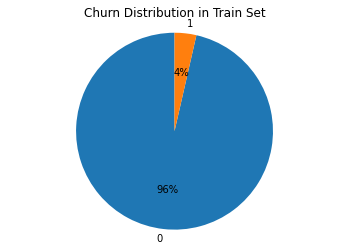

In [8]:
# Trainset Churn Proportion Pie chart
train_fq = pd.DataFrame(y_train['Status_Closed'].value_counts()).reset_index()
labels = train_fq['index']
sizes = train_fq['Status_Closed']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Distribution in Train Set')
plt.show() #highly imbalanced dataset.  4% churn rate in train set.

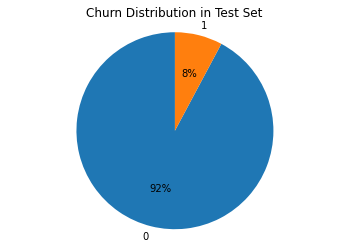

In [9]:
# Test set Churn Proportion Pie chart
test_fq = pd.DataFrame(y_test['Status_Closed'].value_counts()).reset_index()
labels = test_fq['index']
sizes = test_fq['Status_Closed']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Distribution in Test Set')
plt.show() #highly imbalanced dataset.  8% churn rate in test set.

Both the train and test sets are highly imbalanced.  The majority class has over 90% of instances. 

In [6]:
#Data Preparation: Convert Dataframes to Arrays
X_train_ar = X_train4.set_index('Memberid').values
y_train_ar = y_train.set_index('Memberid').values
X_test_ar = X_test4.set_index('Memberid').values

In [9]:
# Logistic Regression and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

In [10]:
# A Function to Fit Models
def ml_fit(x, y):
    methods = [LogisticRegression(solver='lbfgs', max_iter=1000), RandomForestClassifier(n_jobs=None, random_state=27, verbose=1)]
    for md in methods:
        model = md
        model.fit(x, y)
        y_pred = pd.Series(model.predict(X_test_ar))
        Acc = metrics.accuracy_score(y_test['Status_Closed'], y_pred)
        Pre = metrics.precision_score(y_test['Status_Closed'], y_pred)
        Rec = metrics.recall_score(y_test['Status_Closed'], y_pred)
        f1 = metrics.f1_score(y_test['Status_Closed'], y_pred)
        index = methods.index(md)
        if index == 0:
            Accuracy_l.append(Acc)
            Precision_l.append(Pre)
            Recall_l.append(Rec)
            F1_l.append(f1)
        else:
            Accuracy_r.append(Acc)
            Precision_r.append(Pre)
            Recall_r.append(Rec)
            F1_r.append(f1)

In [11]:
#Iterate over Different Sampling Methods
functions = [SMOTE(), BorderlineSMOTE(), SVMSMOTE(), ADASYN(), SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))]  # list of functions
Accuracy_l = []
Precision_l = []
Recall_l = []
F1_l = []
Accuracy_r = []
Precision_r = []
Recall_r = []
F1_r = []
for fn in functions:
    oversample = fn
    over_x, over_y = oversample.fit_resample(X_train_ar, y_train_ar)
    ml_fit(over_x, over_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [12]:
#Fitting Original Data
ml_fit(X_train_ar, y_train_ar)

/Users/hleung/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hleung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [13]:
#A Function For Comparision Plots
def custom_plots(a, b, c, d):
    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize=(12, 8))

    # Set position of bar on X axis
    br1 = np.arange(len(a))
    br2 = [a + barWidth for a in br1]
    br3 = [a + barWidth for a in br2]
    br4 = [a + barWidth for a in br3]

    # Make the plot
    plt.bar(br1, a, color='r', width=barWidth,
            edgecolor='grey', label='Accuracy')
    plt.bar(br2, b, color='g', width=barWidth,
            edgecolor='grey', label='Precision')
    plt.bar(br3, c, color='b', width=barWidth,
            edgecolor='grey', label='Recall')
    plt.bar(br4, d, color='m', width=barWidth,
            edgecolor='grey', label='F1')

    # Adding Xticks
    plt.xlabel('Sampling Methods', fontweight='bold', fontsize=15)
    plt.ylabel('Rate', fontweight='bold', fontsize=15)
    plt.xticks([r + barWidth for r in range(len(a))],
               ['Smote', 'B.Smote', 'SVM.Smote', 'ADASYN', 'Tomek', 'Original'])
    plt.title('Comparison of Sampling Methods')
    plt.legend()
    plt.show()

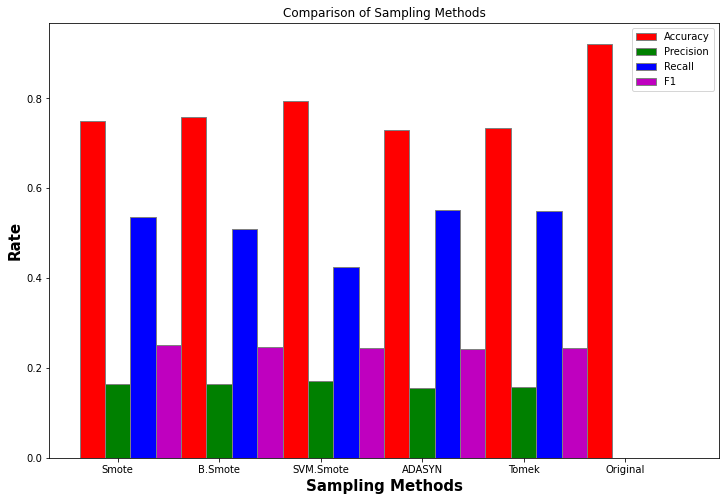

In [14]:
#Logistic Regression Plot
custom_plots(Accuracy_l, Precision_l, Recall_l, F1_l)

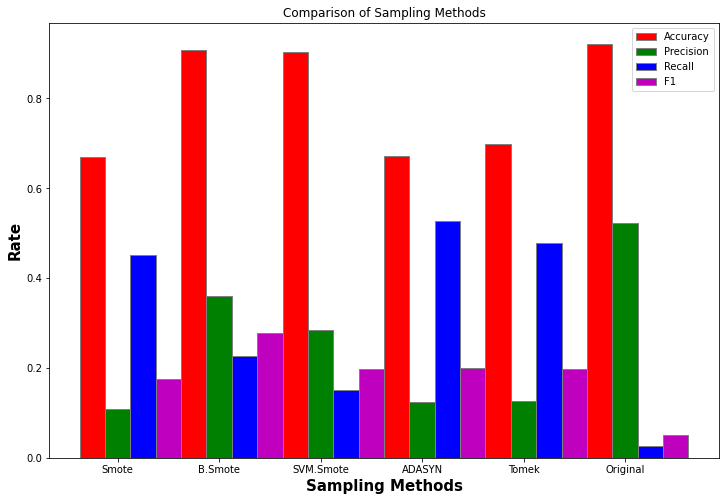

In [15]:
#Random Forest Plot
custom_plots(Accuracy_r, Precision_r, Recall_r, F1_r)

The performance metrics used are accuracy, precision, recall and F1 score.

Accuracy is the ratio of true positive and true negative to all.  It can be misleading especially in imbalanced sample.  In this example, since the churn rate is only 4% in the train set, if the model predicts all cases are negative, the accuracy is 96%, which is very high.  But it fails to predict any positive case.  Therefore we look at other performance measures.

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In this example, of all passengers that predicted as churn, how many actually churn? High precision means low false positive rate.

Recall is the ratio of correctly predicted positive observations to all true postive observations. That is of all true churners, how many can we correctly predict? 

F1 score is like the harmonic mean of precision and recall, it is a balance between the 2.

The above bar charts show the original data is highly imbalanced, it has the highest accuracy but its recall and precision are poor, indicating it cannot accurately predict any churn cases.  ADASYN has the highest recall in both cases.  Since it is a churn prediction problem, it is more important to correctly predict churn cases than nonchurn cases.  Therefore, recall is the most important evaluation criterion.